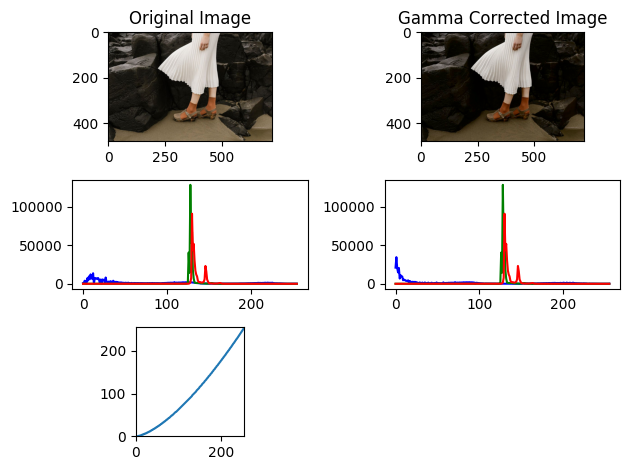

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('D:/Images/highlights_and_shadows.jpg')
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_lab)

#apply gamma correction
gamma = 1.5
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_gamma = cv.LUT(L, table)

#gamma and lab merging
img_lab_gamma = cv.merge([L_gamma, a, b])
img_gamma = cv.cvtColor(img_lab_gamma, cv.COLOR_LAB2BGR)

fig, axarr = plt.subplots(3, 2)  
axarr[0, 0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0, 0].set_title('Original Image')
axarr[0, 1].imshow(cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB))
axarr[0, 1].set_title('Gamma Corrected Image')

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_lab], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c )
    hist_gamma = cv.calcHist([img_lab_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

axarr[2, 0].plot(table)
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')
axarr[2, 1].axis('off')
plt.tight_layout()

plt.show()
